In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


af_results = pd.read_csv('results/Alphafold.clumps.summary.txt',sep='\t')
af_results

,UNIPROT_ID,GENE_NAMES,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED
0,Q14839,CHD4,Q14839,Q14839,3459-A,NaN,1912.0,30,1912,100.0,239,319,0.0000,0.000000,0.0
1,P20155,SPINK2,NaN,P20155,247a-A,NaN,84.0,1,84,100.0,12,13,0.0000,0.000000,-1.0
2,A6NKG5,RTL1,NaN,A6NKG5,13f6-A,NaN,1358.0,162,1198,100.0,95,111,0.0000,0.000000,-1.0
3,Q92560,BAP1,Q92560,Q92560,5172-A,NaN,729.0,1,729,100.0,98,133,0.0000,0.000000,0.0
4,Q92793,CREBBP,Q92793,Q92793,51dd-A,NaN,2442.0,143,2210,100.0,201,271,0.0000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18183,O00187,MASP2,NaN,O00187,15e7-A,NaN,686.0,23,686,100.0,108,113,0.9997,0.999920,-1.0
18184,Q92833,JARID2,NaN,Q92833,51f0-A,NaN,1246.0,21,1202,100.0,108,119,0.9999,0.999955,-1.0
18185,O75396,SEC22B,NaN,O75396,1abf-A,NaN,215.0,1,215,100.0,66,82,0.9999,0.999955,-1.0
18186,Q9HCG7,GBA2,NaN,Q9HCG7,5f8f-A,NaN,927.0,64,899,100.0,91,95,0.9999,0.999955,-1.0


In [2]:
af_results['p_floored']  = af_results['CLUMPS_P']
af_results.loc[af_results['p_floored'] ==0,'p_floored'] = 0.0001

pancan_results = pd.read_csv('results/Pancan102k.clumps.summary.txt',sep='\t')

In [3]:
len(pd.unique(af_results['GENE_NAMES']))

17973

In [4]:
pancan_results

,UNIPROT_ID,GENE_NAMES,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED
0,P42771,CDKN2A,P42771;Q8N726,P42771,1a5e-A,NaN,156.0,1,156,100.0,70,199,0.0000,0.00000,0.0000
1,P28482,MAPK1,P28482,P28482,4qta-A,NaN,360.0,10,358,100.0,42,72,0.0000,0.00000,0.0000
2,P20155,SPINK2,NaN,P20155,2jxd-A,NaN,84.0,23,84,100.0,10,11,0.0000,0.00000,-1.0000
3,Q14790,CASP8,Q14790,Q14790,5l08-E,NaN,479.0,2,182,100.0,60,83,0.0000,0.00000,0.0000
4,Q92793,CREBBP,Q92793,Q09472,4pzt-A,NaN,2442.0,1323,1701,87.9,90,147,0.0000,0.00000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,P50479,PDLIM4,NaN,O70209,1x64-A,NaN,330.0,235,310,54.0,8,11,0.9998,0.99995,-1.0000
19880,Q3MIN7,RGL3,NaN,Q12967,2rgf-A,NaN,710.0,603,699,52.6,22,28,0.9999,0.99995,-1.0000
19881,Q9NZR2,LRP1B,Q9NZR2,Q9NR61,5mvx-A,NaN,4599.0,4200,4360,25.9,54,72,0.9999,0.99995,0.9999
19882,Q8TDN6,BRIX1,NaN,Q08235,6em5-A,NaN,353.0,57,256,53.8,29,34,0.9999,0.99995,-1.0000


In [5]:
af_results.loc[af_results['GENE_NAMES']=='CNOT9']

,UNIPROT_ID,GENE_NAMES,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,p_floored
59,Q92600,CNOT9,NaN,Q92600,5185-A,NaN,299.0,1,299,100.0,40,55,0.0002,0.053494,-1.0,0.0002


/home/adunford/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


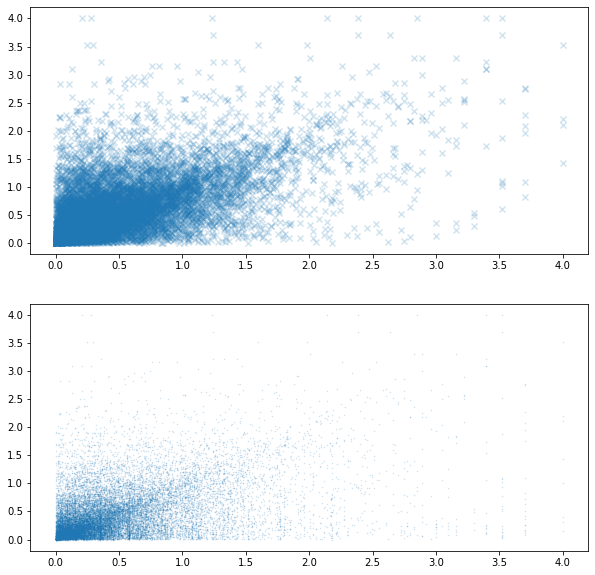

In [6]:
df = af_results.merge(pancan_results.groupby('GENE_NAMES')['CLUMPS_P'].min(),left_on='GENE_NAMES',right_index=True,suffixes=['_af','_pc'])
df1 =af_results.merge(pancan_results,on='GENE_NAMES',suffixes=['_af','_pc'])


fig, ax = plt.subplots(2)
fig.set_size_inches(10,10)
ax[0].scatter(-np.log10(df['CLUMPS_P_af']),-np.log10(df['CLUMPS_P_pc']),marker='x',alpha=0.2)
ax[1].scatter(-np.log10(df1['CLUMPS_P_af']),-np.log10(df1['CLUMPS_P_pc']),marker='.',s=1,alpha=0.2)


In [7]:
df.loc[df['GENE_NAMES']=='BRAF']

,UNIPROT_ID,GENE_NAMES,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P_af,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,p_floored,CLUMPS_P_pc
18,P15056,BRAF,P15056,P15056,2344-A,NaN,766.0,41,766,100.0,99,819,0.0,0.0,0.0,0.0001,0.0


In [8]:
df

,UNIPROT_ID,GENE_NAMES,IN_CANCER_GENE_LISTS,MAPPED_UNIPROT_ID,PDBID-CHAIN,PDB_FRAGMENT,UNIPROT_SEQ_LENGTH,MAP_START,MAP_END,PERCENT_IDENTITY,NSITES,NSAMPLES,CLUMPS_P_af,CLUMPS_Q_FULL,CLUMPS_Q_RESTRICTED,p_floored,CLUMPS_P_pc
0,Q14839,CHD4,Q14839,Q14839,3459-A,NaN,1912.0,30,1912,100.0,239,319,0.0000,0.000000,0.0,0.0001,0.0005
1,P20155,SPINK2,NaN,P20155,247a-A,NaN,84.0,1,84,100.0,12,13,0.0000,0.000000,-1.0,0.0001,0.0000
2,A6NKG5,RTL1,NaN,A6NKG5,13f6-A,NaN,1358.0,162,1198,100.0,95,111,0.0000,0.000000,-1.0,0.0001,0.0085
3,Q92560,BAP1,Q92560,Q92560,5172-A,NaN,729.0,1,729,100.0,98,133,0.0000,0.000000,0.0,0.0001,0.0001
4,Q92793,CREBBP,Q92793,Q92793,51dd-A,NaN,2442.0,143,2210,100.0,201,271,0.0000,0.000000,0.0,0.0001,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18183,O00187,MASP2,NaN,O00187,15e7-A,NaN,686.0,23,686,100.0,108,113,0.9997,0.999920,-1.0,0.9997,0.6823
18184,Q92833,JARID2,NaN,Q92833,51f0-A,NaN,1246.0,21,1202,100.0,108,119,0.9999,0.999955,-1.0,0.9999,0.6567
18185,O75396,SEC22B,NaN,O75396,1abf-A,NaN,215.0,1,215,100.0,66,82,0.9999,0.999955,-1.0,0.9999,0.9689
18186,Q9HCG7,GBA2,NaN,Q9HCG7,5f8f-A,NaN,927.0,64,899,100.0,91,95,0.9999,0.999955,-1.0,0.9999,0.9993


/home/adunford/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


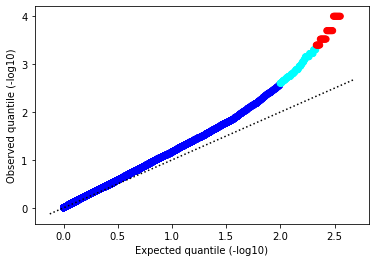

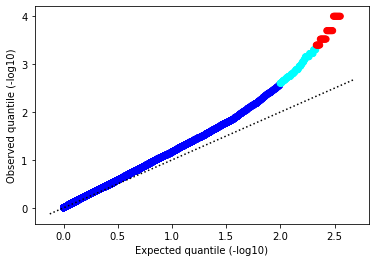

In [12]:
from capy.plots import QQ
QQ(af_results['CLUMPS_P'])